# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [188]:
import random
import pandas as pd
from math import e
from math import log
#from math import ln
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
#def f1(x):
 #   f11 = (e**x) * (log(x))
  #  f12 = sp.integrate(f11, x)
   # return f11

#def f2(x):
 #   f21 = sp.sin(x) * (log(x))
  #  f22 = sp.integrate(f21, x)
   # return f22

In [190]:
def montecarlo(f,N,a,b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

In [191]:
def f1(x):
    return (e**x) * (np.log(x))
def f2(x) :
    return np.sin(x)*np.log(x)

In [193]:
a = 1
b = 3
N = np.logspace(1,5,5)
tabla = pd.DataFrame(columns=["Aproximación_Función1", "Aproximación_Función2"], index=N)

tabla

,Aproximación_Función1,Aproximación_Función2
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [194]:
for i in N:
    tabla.loc[i, "Aproximación_Función1"] = montecarlo(f1, int(i), a, b)

for i in N:
    tabla.loc[i, "Aproximación_Función2"] = montecarlo(f2, int(i), a, b)
tabla

,Aproximación_Función1,Aproximación_Función2
10.0,8.443265,0.914321
100.0,14.420272,0.837995
1000.0,14.162102,0.870678
10000.0,14.070943,0.874746
100000.0,14.026705,0.868479


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [195]:
def montecarlo2(region,ax,bx,ay,by,N):
    x = np.random.uniform(ax,bx,N)
    y = np.random.uniform(ay,by,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return ((x**2+2*y**2) <= (-2*x+8*y-7))

In [196]:
N = np.logspace(1,5,5)
tabla2 = pd.DataFrame(columns=["Aprox_Función", "Error"], index=N)
tabla2

,Aprox_Función,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


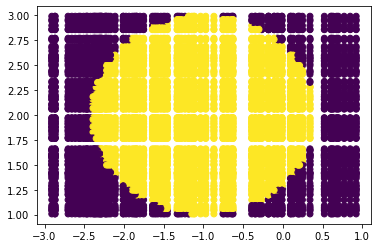

In [197]:
x = np.random.uniform(-3,1,100)
y = np.random.uniform(1,3,100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y, c= bernoulli(X,Y))

In [198]:
ax = -3
bx = 1
ay = 1
by = 3
for i in N:
    tabla2.loc[i,'Aprox_Función']= montecarlo2(bernoulli,ax,bx,ay,by,int(i))
    
tabla2

,Aprox_Función,Error
10.0,3.2,NaN
100.0,4.08,NaN
1000.0,4.704,NaN
10000.0,4.4336,NaN
100000.0,4.41544,NaN


In [199]:
A_rec = (bx-ax)*(by-ay)
for i in N:
    AD = tabla2['Aprox_Función'][i]
    c_real = np.sqrt((1-(AD/A_rec))/(AD/A_rec))
    tabla2.loc[i,"Error"]= c_real
    
tabla2

,Aprox_Función,Error
10.0,3.2,1.224745
100.0,4.08,0.980196
1000.0,4.704,0.837066
10000.0,4.4336,0.896885
100000.0,4.41544,0.901013


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.